In [265]:
import numpy as np

def TVDenoising(y, a):
    
    x = np.copy(y) # Output
    
    k = 0 # Current index
    k0 = 0 # Current segment start
    kmin = 0 # Last index in where umin=a
    kmax = 0 # Last index in where umax=-a
    
    vmin = y[0] - a # Min value of current segment
    vmax = y[0] + a # Max value of current segment
    umin = a # Dual value in vmin case
    umax = -a  # Dual value in vmax case
    
    while(True):
        
        while(k == y.size-1): # Right boundary reached
            if(umin < 0): # Umin too low
                x[k0:kmin+1] = vmin
                kmin += 1
                k = kmin
                k0 = kmin
                vmin = y[k]
                umin = a 
                umax = y[k] + a - vmax
            elif(umax > 0): # Umax too high
                x[k0:kmax+1] = vmax
                kmax += 1
                k = kmax
                k0 = kmax
                vmax = y[k]
                umax = -a
                umin = y[k] - a - vmin
            else: # Boundary condition satisfied
                x[k0:] = vmin + umin/(k - k0 + 1)
                return x
            
        if(y[k+1] + umin - vmin < -a): # New umin would be < -a (backtrack)
            x[k0:kmin+1] = vmin
            kmin += 1
            k = kmin
            k0 = kmin
            kmax = kmin
            vmin = y[k]
            vmax = y[k] + 2*a
            umin = a 
            umax = -a
        elif(y[k+1] + umax - vmax > a): # New umax would be > a (backtrack to put a jump at kmin)
            x[k0:kmax+1] = vmax
            kmax += 1
            k = kmax
            k0 = kmax
            kmin = kmax
            vmax = y[k]
            vmin = y[k] - 2*a
            umin = a 
            umax = -a
        else: # Continue segment, updating vmin,vmax,umin,umax
            k += 1
            if(umin >= a):
                vmin += (umin - a)/(k - k0 + 1)
                umin = a
                kmin = k
            if(umax <= -a):
                vmax += (umax + a)/(k - k0 + 1)
                umax = -a
                kmax = k

In [266]:
import matplotlib.pyplot as plt

def test_case(N, p, s):

    y = np.zeros((N,))

    for i in range(1,N):

        if(np.random.rand() < p):
            y[i] = y[i-1]
        else:
            y[i] = y[i-1] + np.random.normal(0, s)
    
    return y

def test_case2(N, n1, n2, y1, y2):

    y = np.zeros((np.random.randint(n1,n2+1),1))

    while(y.size < N):
        yn = np.ones((np.random.randint(n1,n2+1),1))*np.random.randint(y1,y2)
        y = np.append(y, yn)

    return y

def test_case3(N, n1, n2):

    y = np.zeros((n1,0))

    while(y.size < N):
        
        x = np.random.rand()

        if(x < 0.333):
            y = np.append(y, -np.ones((np.random.randint(n1,n2),1)))
        elif(x < 0.666):
            y = np.append(y, -np.zeros((np.random.randint(n1,n2),1)))
        else:
            y = np.append(y, np.ones((np.random.randint(n1,n2),1)))
    
    return y[:N]

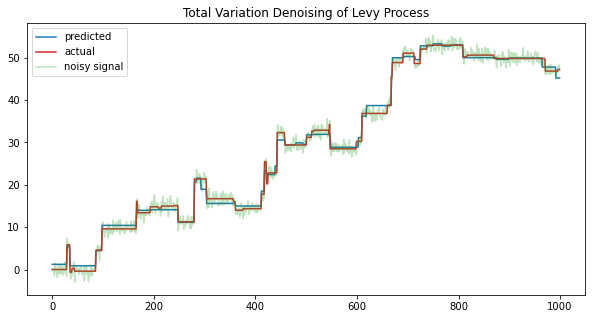

In [312]:
y = test_case(1000,0.95,4)
ynoise = y + np.random.normal(0, 1, y.shape)
x = TVDenoising(ynoise, 1)
plt.title("Total Variation Denoising of Levy Process")

plt.plot(x, label='predicted',color='tab:blue')
plt.plot(y, label='actual', color='tab:red')
plt.plot(ynoise, label='noisy signal',color='tab:green',alpha=0.3)

plt.legend()
plt.show()

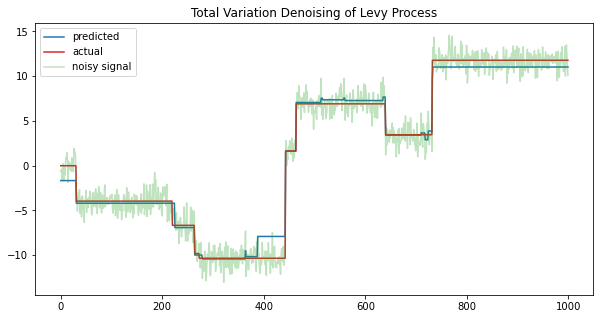

In [311]:
y = test_case(1000,0.99,5)
ynoise = y + np.random.normal(0, 1, y.shape)
x = TVDenoising(ynoise, 1.1)
plt.title("Total Variation Denoising of Levy Process")

plt.plot(x, label='predicted',color='tab:blue')
plt.plot(y, label='actual', color='tab:red')
plt.plot(ynoise, label='noisy signal',color='tab:green',alpha=0.3)

plt.legend()
plt.show()

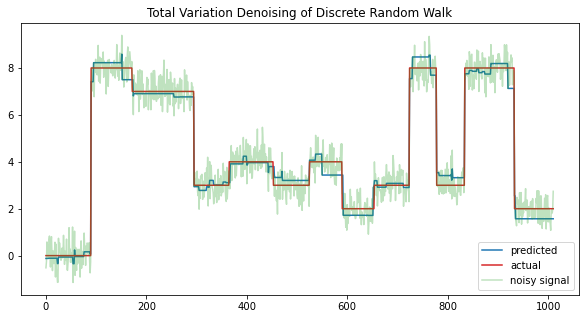

In [285]:
y = test_case2(1000,50,100,1,10)
ynoise = y + np.random.normal(0, 0.5, y.shape)
x = TVDenoising(ynoise, 0.4)
plt.title("Total Variation Denoising of Discrete Random Walk")

plt.plot(x, label='predicted',color='tab:blue')
plt.plot(y, label='actual', color='tab:red')
plt.plot(ynoise, label='noisy signal',color='tab:green',alpha=0.3)

plt.legend()
plt.show()

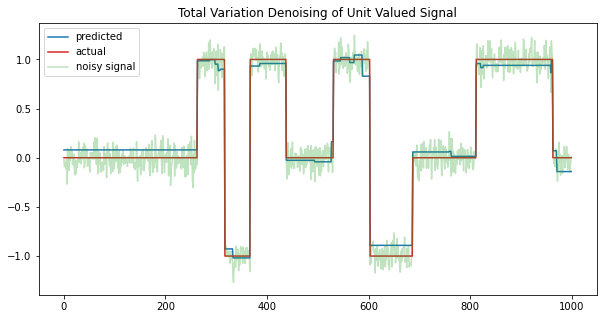

In [284]:
y = test_case3(1000,50,100)
ynoise = y + np.random.normal(0, 0.1, y.shape)
x = TVDenoising(ynoise, 0.1)
plt.title("Total Variation Denoising of Unit Valued Signal")

plt.plot(x, label='predicted',color='tab:blue')
plt.plot(y, label='actual', color='tab:red')
plt.plot(ynoise, label='noisy signal',color='tab:green',alpha=0.3)

plt.legend()
plt.show()

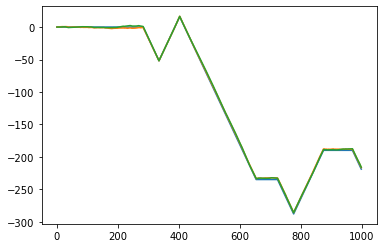

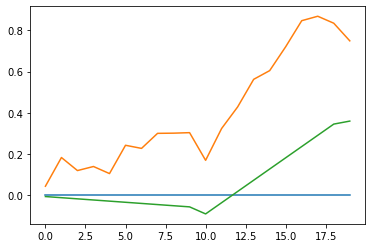

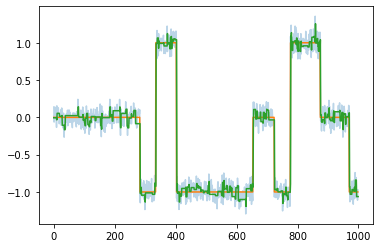

In [137]:
y = test_case3(1000,50,100)
ynoise = y + np.random.normal(0, 0.1, y.shape)
x = TVDenoising(ynoise, 0.05)

ytilde = np.cumsum(y)
ytildenoise = np.cumsum(ynoise)
xtilde = np.cumsum(x)

plt.plot(ytilde)
plt.plot(ytildenoise)
plt.plot(xtilde)
plt.show()

plt.plot(ytilde[:20])
plt.plot(ytildenoise[:20])
plt.plot(xtilde[:20])
plt.show()

plt.plot(np.diff(ytildenoise), alpha = 0.3)
plt.plot(np.diff(ytilde))
plt.plot(x)
plt.show()



In [ ]:
plt.plot(np.diff(ytilde))
plt.plot(np.diff(ytildenoise))
plt.show()

In [109]:
def test_case2(N, n1, n2, y1, y2):

    y = np.zeros((np.random.randint(n1,n2+1),1))

    while(y.size < N):
        yn = np.ones((np.random.randint(n1,n2+1),1))*np.random.randint(y1,y2)
        y = np.append(y, yn)

    return y

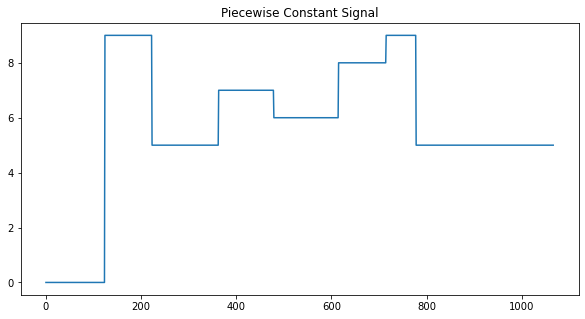

In [167]:
y = test_case2(1000, 50, 150, 5, 10)
ynoise = y + np.random.normal(0, 0.5, y.shape)
plt.title("Piecewise Constant Signal")
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(y)
plt.show()

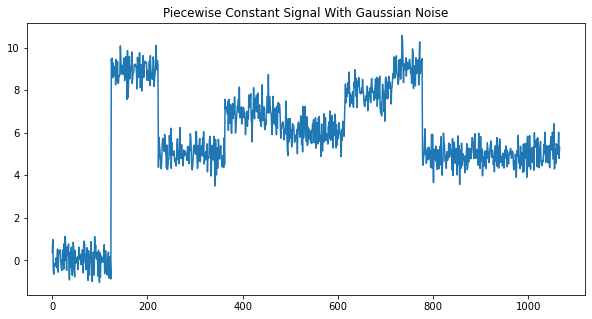

In [168]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Piecewise Constant Signal With Gaussian Noise")
plt.plot(ynoise)
plt.show()

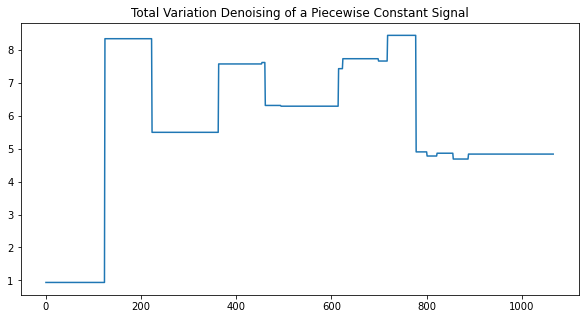

In [180]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Total Variation Denoising of a Piecewise Constant Signal")
plt.plot(TVDenoising(ynoise, 0.56))
plt.show()

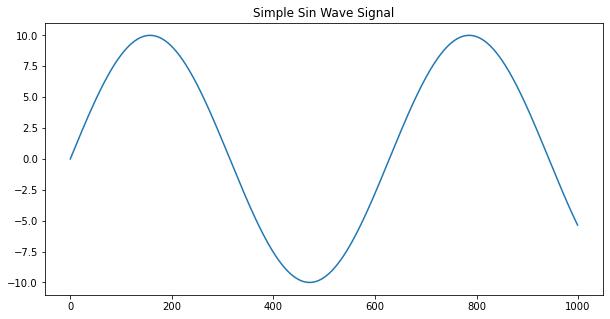

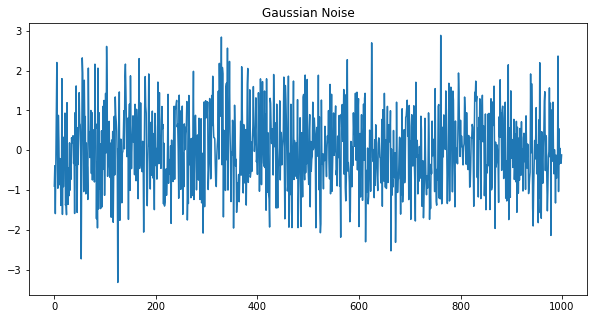

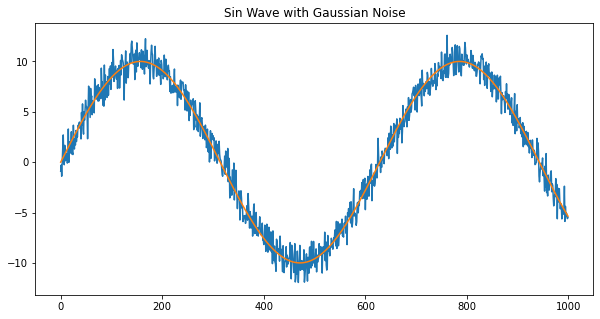

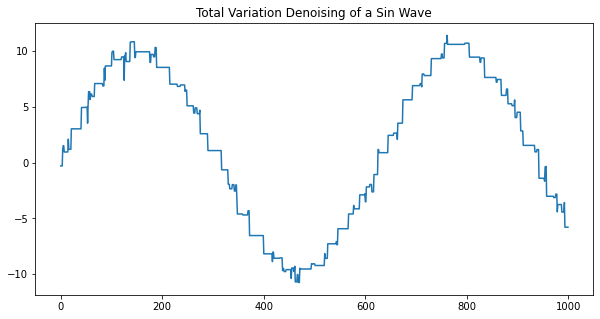

In [234]:
t = np.arange(1000)*0.01
y = 10*np.sin(t)
ynoise = y + np.random.normal(0,1, y.shape)
plt.title("Simple Sin Wave Signal")
plt.plot(y)
plt.show()
plt.title("Gaussian Noise")
plt.plot(ynoise - y)
plt.show()
plt.title("Sin Wave with Gaussian Noise")
plt.plot(ynoise)
plt.plot(y)
plt.show()
plt.title("Total Variation Denoising of a Sin Wave")
plt.plot(TVDenoising(ynoise, 0.6))
plt.show()

In [190]:
ytv = 0
for i in range(y.shape[0]-1):
    ytv += abs(y[i] - y[i+1])
print(ytv)

65.35581139865225


In [191]:
ynoisetv = 0
for i in range(y.shape[0]-1):
    ynoisetv += abs(ynoise[i] - ynoise[i+1])
print(ynoisetv)

1086.1991728855578
